In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets,models,transforms
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available else "cpu"

In [3]:
device

'cuda'

In [5]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

--2021-04-27 04:48:22--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 99.84.189.9, 99.84.189.66, 99.84.189.11, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.84.189.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  82.5MB/s    in 0.5s    

2021-04-27 04:48:22 (82.5 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [12]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [13]:
train_dataset = datasets.ImageFolder("./hymenoptera_data/train",transform=transform)

In [15]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)

In [16]:
data_iter = iter(train_loader)

In [17]:
imgs,labels = data_iter.next()

In [18]:
labels

tensor([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1])

In [19]:
imgs.size()

torch.Size([32, 3, 224, 224])

In [21]:
img = imgs[0]
img_permute = img.permute(1,2,0)

In [22]:
img_permute = 0.5*img_permute + 0.5

In [23]:
img_permute = np.clip(img_permute,0,1)

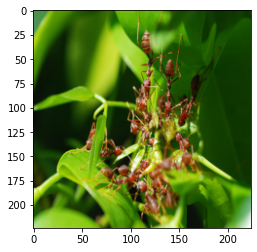

In [25]:
plt.imshow(img_permute)

In [26]:
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [27]:
for param in model.parameters():
    param.requires_grad = False

In [28]:
model.fc = nn.Linear(512,2)

In [29]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(),lr=0.001)

In [36]:
num_epochs = 15
losses = []
accs = []
for epochs in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs,labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output,labels)
        running_loss += loss.item()
        pred = torch.argmax(output,dim=1)
        running_acc  += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_loader)
    running_acc /= len(train_loader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epochs,running_loss,running_acc))


epoch: 0, loss: 0.5028569437563419, acc: 0.789843738079071
epoch: 1, loss: 0.37820661067962646, acc: 0.864062488079071
epoch: 2, loss: 0.3356315791606903, acc: 0.8726562261581421
epoch: 3, loss: 0.28678069822490215, acc: 0.91796875
epoch: 4, loss: 0.23829651437699795, acc: 0.952343761920929
epoch: 5, loss: 0.21099348738789558, acc: 0.944531261920929
epoch: 6, loss: 0.20914197713136673, acc: 0.948437511920929
epoch: 7, loss: 0.1652662791311741, acc: 0.9765625
epoch: 8, loss: 0.1809172909706831, acc: 0.9624999761581421
epoch: 9, loss: 0.15958423633128405, acc: 0.971875011920929
epoch: 10, loss: 0.14675623178482056, acc: 0.9609375
epoch: 11, loss: 0.17872065212577581, acc: 0.9375
epoch: 12, loss: 0.1451380243524909, acc: 0.96875
epoch: 13, loss: 0.163407270796597, acc: 0.953125
epoch: 14, loss: 0.12574697472155094, acc: 0.98046875


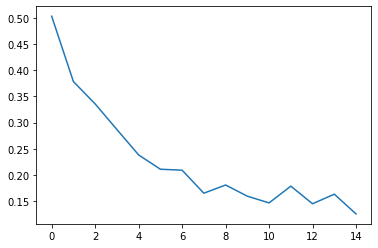

In [37]:
plt.plot(losses)

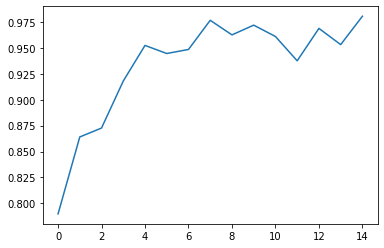

In [38]:
plt.plot(accs)